<a href="https://colab.research.google.com/github/gxilly/bsc_dpdm22/blob/main/%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.chdir('/content/gdrive/MyDrive/bscdata')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/bscdata


In [17]:
# open file
data = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name=0)
print(data.shape) # shown number of (row, column)
data.head()

(190, 14)


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


# สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

In [103]:
est1 = data[data['ID ผู้ประเมิน']==1]

In [80]:
data01 = data1[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
data01.head(5)

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,มั่นใจ,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,มั่นใจ,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,มั่นใจ,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [106]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100.0,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,4.316360e+06,3.938500e+06,NaN,NaN,NaN,NaN,100.0
std,0.0,2.865391e+06,2.368553e+06,NaN,NaN,NaN,NaN,NaN
min,1.0,3.900000e+05,6.000000e+05,NaN,NaN,NaN,NaN,100.0
25%,1.0,2.892750e+06,2.775000e+06,NaN,NaN,NaN,NaN,100.0
50%,1.0,3.962000e+06,3.600000e+06,NaN,NaN,NaN,NaN,100.0
75%,1.0,5.000000e+06,4.500000e+06,NaN,NaN,NaN,NaN,100.0
max,1.0,2.094900e+07,1.600000e+07,NaN,NaN,NaN,NaN,100.0


In [104]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [105]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3586 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

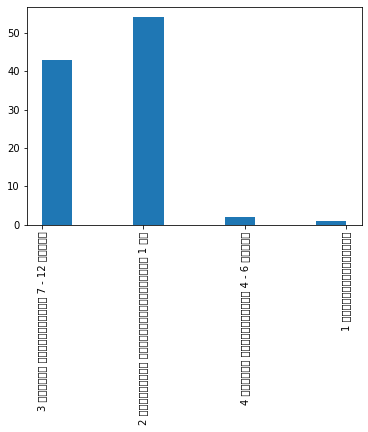

In [107]:
score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical');

In [72]:
score 

(array([43.,  0.,  0., 54.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [108]:
est2 = data[data['ID ผู้ประเมิน']==2]

In [27]:
data02 = data2[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
data02.head(5)

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,มั่นใจ,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,มั่นใจ,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,มั่นใจ,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,มั่นใจ,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [109]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,90.0,9.000000e+01,8.900000e+01,0.0,0.0,0.0,0.0,0.0
mean,2.0,4.240733e+06,4.153258e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,2.714815e+06,2.386901e+06,NaN,NaN,NaN,NaN,NaN
min,2.0,3.900000e+05,9.900000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,2.860000e+06,2.600000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,4.000000e+06,3.900000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,5.000000e+06,4.900000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,2.094900e+07,1.700000e+07,NaN,NaN,NaN,NaN,NaN


In [110]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

In [111]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#เปรียบเทียบความแตกต่างในการประเมิณราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

In [73]:
from sklearn.metrics import mean_absolute_percentage_error

In [78]:
y_true = data01[['ราคาทรัพย์']]
y_pred = data01[['ประเมินราคาซื้อ-ขาย']]

In [79]:
mean_absolute_percentage_error(y_true, y_pred)

0.12133451335450657

In [97]:
est1 = data1[['ราคาทรัพย์','post id','ประเมินราคาซื้อ-ขาย']]
est1

,ราคาทรัพย์,post id,ประเมินราคาซื้อ-ขาย
0,2700000.0,https://nayoo.co/khonkaen/posts/25,2500000.0
2,2600000.0,https://nayoo.co/khonkaen/posts/33,2200000.0
4,5900000.0,https://nayoo.co/khonkaen/posts/495,5000000.0
6,4400000.0,https://nayoo.co/khonkaen/posts/564,3500000.0
8,2750000.0,https://nayoo.co/khonkaen/posts/566,2500000.0
...,...,...,...
155,5500000.0,https://nayoo.co/khonkaen/posts/19495,4500000.0
156,7911000.0,https://nayoo.co/khonkaen/posts/19496,5200000.0
157,2000000.0,https://nayoo.co/khonkaen/posts/20,3600000.0
158,4000000.0,https://nayoo.co/khonkaen/posts/31,4000000.0


In [98]:
est2 = data2[['ราคาทรัพย์','post id','ประเมินราคาซื้อ-ขาย']]
est2

,ราคาทรัพย์,post id,ประเมินราคาซื้อ-ขาย
1,2700000.0,https://nayoo.co/khonkaen/posts/25,2700000.0
3,2600000.0,https://nayoo.co/khonkaen/posts/33,2400000.0
5,5900000.0,https://nayoo.co/khonkaen/posts/495,9000000.0
7,4400000.0,https://nayoo.co/khonkaen/posts/564,3700000.0
9,2750000.0,https://nayoo.co/khonkaen/posts/566,2500000.0
...,...,...,...
185,5500000.0,https://nayoo.co/khonkaen/posts/19495,5000000.0
186,7911000.0,https://nayoo.co/khonkaen/posts/19496,7400000.0
187,2000000.0,https://nayoo.co/khonkaen/posts/20,2500000.0
188,4000000.0,https://nayoo.co/khonkaen/posts/31,3900000.0


ใช้ map

In [99]:
table_merge = est1.merge(est2, how ='left', left_on='post id',right_on='post id') 
print(table_merge.shape)

(100, 5)


In [100]:
table_merge

,ราคาทรัพย์_x,post id,ประเมินราคาซื้อ-ขาย_x,ราคาทรัพย์_y,ประเมินราคาซื้อ-ขาย_y
0,2700000.0,https://nayoo.co/khonkaen/posts/25,2500000.0,2700000.0,2700000.0
1,2600000.0,https://nayoo.co/khonkaen/posts/33,2200000.0,2600000.0,2400000.0
2,5900000.0,https://nayoo.co/khonkaen/posts/495,5000000.0,5900000.0,9000000.0
3,4400000.0,https://nayoo.co/khonkaen/posts/564,3500000.0,4400000.0,3700000.0
4,2750000.0,https://nayoo.co/khonkaen/posts/566,2500000.0,2750000.0,2500000.0
...,...,...,...,...,...
95,5500000.0,https://nayoo.co/khonkaen/posts/19495,4500000.0,5500000.0,5000000.0
96,7911000.0,https://nayoo.co/khonkaen/posts/19496,5200000.0,7911000.0,7400000.0
97,2000000.0,https://nayoo.co/khonkaen/posts/20,3600000.0,2000000.0,2500000.0
98,4000000.0,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [92]:
table_merge.rename(columns={'ID ผู้ประเมิน_x' : 'ผู้ประเมิน 1', 'ID ผู้ประเมิน_y' : 'ผู้ประเมิน 2'})


,ผู้ประเมิน 1,post id,ประเมินราคาซื้อ-ขาย_x,ผู้ประเมิน 2,ประเมินราคาซื้อ-ขาย_y
0,1,https://nayoo.co/khonkaen/posts/25,2500000.0,2.0,2700000.0
1,1,https://nayoo.co/khonkaen/posts/33,2200000.0,2.0,2400000.0
2,1,https://nayoo.co/khonkaen/posts/495,5000000.0,2.0,9000000.0
3,1,https://nayoo.co/khonkaen/posts/564,3500000.0,2.0,3700000.0
4,1,https://nayoo.co/khonkaen/posts/566,2500000.0,2.0,2500000.0
...,...,...,...,...,...
95,1,https://nayoo.co/khonkaen/posts/19495,4500000.0,2.0,5000000.0
96,1,https://nayoo.co/khonkaen/posts/19496,5200000.0,2.0,7400000.0
97,1,https://nayoo.co/khonkaen/posts/20,3600000.0,2.0,2500000.0
98,1,https://nayoo.co/khonkaen/posts/31,4000000.0,2.0,3900000.0


In [112]:
est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


<ipython-input-112-91c686f91bd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
